# STATISTICS PROJECT: pH and bicarbonate Levels in Ground-Water
by Siddhant Sharma (18csu210), Shubham Popli (18csu209), Utkarsh (18csu223)

# Introduction

Our topic is an inferntial statstics project where we are estimating pH and bicarbonate Levels in Ground-Water of Population i.e of all the Ground-Water on Earth using our sample which has pH and bicarbonate Levels in Ground-Water of 34 wells in Northwest Texas. The population mean of pH Level in Ground-Water is 7.25 and the population mean of bicarbonate Level in Ground-Water is 126.4 ppm (parts per million).
Reference: Union Carbide Technical Report K/UR-1
Link: https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/svls/frames/svls16.html

# Problem Statement

bicarbonate, which is a part of sodium bicarbonate is a famous antacid which neutralizes the acid HCl in our stomach
Many people think that bicarbonate is basic in nature and it in general reduces the pH level
So we are analysing the data and concluding that the amount of Bicarbonate does not affect the pH level.


In [1]:
#packages 

import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import sem, t
from scipy import mean
from scipy import stats

In [2]:
GroundWater=pd.read_csv("Ground_Water.csv")
GroundWater

,pH,bicarbonate ppm
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171
5,7.8,143
6,7.3,217
7,8.0,190
8,7.1,142
9,7.5,190


In the following data
X = pH of well water
Y = Bicarbonate (parts per million) of well water

# Brief Description of The Dataset:

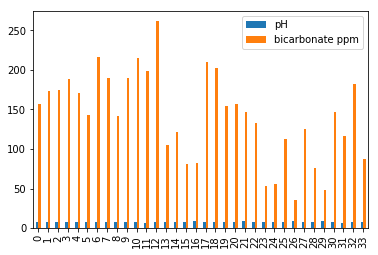

In [3]:
GroundWater.plot.bar()

This is a split-category bar chart. This sort of chart is useful if you want to compare frequencies, but it’s difficult to see proportions and percentages.In this chart x=ph value whereas on y-axis there is range of bicarbonate(ppm).

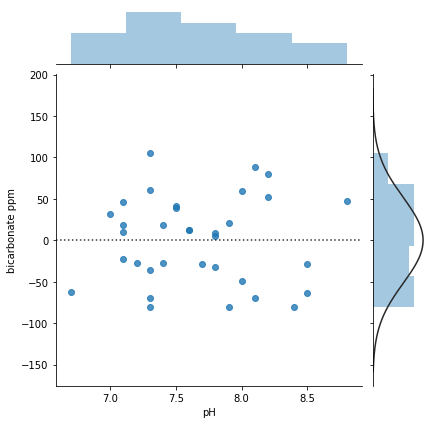

In [4]:
sns.jointplot(x='pH',y='bicarbonate ppm',data=GroundWater,kind='resid')

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what kind of  parameter to compare with.
Here x=ph range and at y=bicarbonate(ppm).

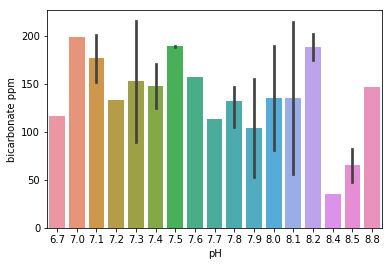

In [6]:
sns.barplot(x='pH',y='bicarbonate ppm',data=GroundWater)

Barplot is a general plot that allows you to aggregate the categorical data based off some function, by default the mean
Here at x=p-h range Y=bicarbonate(ppm).The maximum value is of p-h range 7.3 whose bicarbonate level is more than 200.

# Hypothesis Testing of pH (t-test)

Ho: population mean of pH = 7.25
Ha: population mean of pH != 7.25

confidence=0.95
n=34
df=33
SD=standard deviation
formula: t-test = (sample mean-population mean)/(sample SD/sqrt(n))
method: Critical Value Method

In [7]:
pH_population_mean = 7.25
pH_mean=GroundWater.mean().iloc[0]

In [8]:
pH_standard_deviation = GroundWater.std()[0]

pH_standard_error = stats.sem(GroundWater)[0] 

pH_conf_int = stats.t.interval(0.95, len(GroundWater)-1, loc=pH_population_mean, scale=pH_standard_error)

In [9]:
pH_conf_int

(7.075010789381968, 7.424989210618032)

In [10]:
pH_mean

7.6617647058823515

In [11]:
if pH_mean>pH_conf_int[0] and pH_mean<pH_conf_int[1]:
    print("Null Hypothesis Not Rejected")
else :
    print("Null Hypothesis Rejected")

Null Hypothesis Rejected


Conclusion-

As sample mean is outside of the range (7.075010789381968, 7.424989210618032)
Null Hypothesis Rejected

# Hypothesis Testing of bicarbonate level in ppm (t-test)

Ho: population mean of bicarbonate = 126.4
Ha: population mean of bicarbonate != 126.4

confidence=0.95
n=34
df=33
SD=standard deviation
formula: t-test = (sample mean-population mean)/(sample SD/sqrt(n))
method: Critical Value Method

In [12]:
bc_population_mean = 126.4
bc_mean=GroundWater.mean().iloc[1]

In [13]:
bc_standard_deviation = GroundWater.std()[1]

bc_standard_error = stats.sem(GroundWater)[1] 

bc_conf_int = stats.t.interval(0.95, len(GroundWater)-1, loc=bc_population_mean, scale=bc_standard_error)

In [14]:
bc_conf_int

(106.9348713881959, 145.8651286118041)

In [15]:
bc_mean

142.7941176470588

In [16]:
if bc_mean>bc_conf_int[0] and bc_mean<bc_conf_int[1]:
    print("Null Hypothesis Not Rejected")
else :
    print("Null Hypothesis Rejected")

Null Hypothesis Not Rejected


Conclusion-

As sample mean is inside of the range (106.9348713881959, 145.8651286118041)
Null Hypothesis Not Rejected

# Correlation between X and Y:

In [17]:
#convert dataframe to matrix
conv_arr= GroundWater.values

#split matrix into 3 columns each into 1d array

arr1 = np.delete(conv_arr,[1,2],axis=1) 
arr2 = np.delete(conv_arr,[0,2],axis=1) 
arr3 = np.delete(conv_arr,[0,1],axis=1) 

#converting into 1D array
arr1 = arr1.ravel()
arr2 = arr2.ravel()

print(arr1)
print(arr2)

[7.6 7.1 8.2 7.5 7.4 7.8 7.3 8.  7.1 7.5 8.1 7.  7.3 7.8 7.3 8.  8.5 7.1
 8.2 7.9 7.6 8.8 7.2 7.9 8.1 7.7 8.4 7.4 7.3 8.5 7.8 6.7 7.1 7.3]
[157. 174. 175. 188. 171. 143. 217. 190. 142. 190. 215. 199. 262. 105.
 121.  81.  82. 210. 202. 155. 157. 147. 133.  53.  56. 113.  35. 125.
  76.  48. 147. 117. 182.  87.]


C:\Users\Sanjay\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  
C:\Users\Sanjay\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  import sys


In [18]:
x=arr1
y=arr2

# number of observations/points 
n = np.size(x) 

# mean of x and y vector 
m_x, m_y = np.mean(x), np.mean(y) 

# calculating cross-deviation and deviation about x 
SS_xy = np.sum(y*x) - n*m_y*m_x

Covariance = SS_xy/n

print(Covariance)

-9.219636678200914


Covariance(x,y) = SS_xy/n = -9.219636678200914

In [19]:
corelation =GroundWater.corr
corelation()

,pH,bicarbonate ppm
pH,1.000000,-0.339511
bicarbonate ppm,-0.339511,1.000000


Correlation coefficient(r) = -0.339511

# Regression line between X and Y:

In [20]:
x=arr1
y=arr2

# number of observations/points 
n = np.size(x) 

# mean of x and y vector 
m_x, m_y = np.mean(x), np.mean(y) 

# calculating cross-deviation and deviation about x 
SS_xy = np.sum(y*x) - n*m_y*m_x 
SS_xx = np.sum(x*x) - n*m_x*m_x 

# calculating regression coefficients 
b_1 = SS_xy / SS_xx 
b_0 = m_y - b_1*m_x 

print(b_0)
print(b_1)

432.14715991637104
-37.76584812728067


regression line is : y = b_0 + b_1*x
                     y = 432.14715991637104 - 37.76584812728067*x

In [21]:
SS_yy = np.sum(y*y) - n*m_y*m_y
print(SS_yy)

102703.55882352951


In [22]:
r2=(b_1*b_1*SS_xx)/SS_yy
print(r2)

0.11526739372275431


COEFFICIENT OF DETERMINATION (r^2) = (b_1*b_1*SS_xx)/SS_yy = 0.11526739372275431

# Regression Plot:

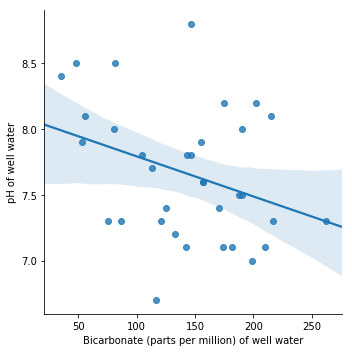

In [23]:
fig=sns.lmplot(x='bicarbonate ppm',y='pH',data=GroundWater)
fig.set_axis_labels('Bicarbonate (parts per million) of well water', 'pH of well water')

# Chi-Squared Independence Test:

confidence = 0.95

Ho: pH level is independent of bicarbonate level (p_value>=0.05)
Ha: pH level is dependent of bicarbonate level (p_value<0.05)

formula: chi2_stat = ∑ (O-E)²/E
         where O = original value, E = expected value

In [24]:
table=pd.read_csv("chi2_table.csv")
table

,pH-Range,Unnamed: 1,bicarbonate(ppm),Unnamed: 3,Unnamed: 4
0,NaN,0-100,100-200,200-300,Total
1,6.5-7,0,2,0,2
2,7-7.5,2,9,3,14
3,7.5-8,2,8,0,10
4,8.-8.5,4,1,2,7
5,8.5-9,0,1,0,1
6,Total,8,21,5,34


making it into workable dataframe

In [25]:
a1=[0,2,0]
a2=[2,9,3]
a3=[2,8,0]
a4=[4,1,2]
a5=[0,1,0]
water=np.array([a1,a2,a3,a4,a5])
water

array([[0, 2, 0],
       [2, 9, 3],
       [2, 8, 0],
       [4, 1, 2],
       [0, 1, 0]])

In [26]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(water)

In [27]:
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
11.703401360544216


===Degrees of Freedom===
8


===P-Value===
0.16493604243009805


===Contingency Table===
[[0.47058824 1.23529412 0.29411765]
 [3.29411765 8.64705882 2.05882353]
 [2.35294118 6.17647059 1.47058824]
 [1.64705882 4.32352941 1.02941176]
 [0.23529412 0.61764706 0.14705882]]


In [28]:
if p_val<0.05:
    print("Null Hypothesis Rejected")
else:
    print("Null Hypothesis Not Rejected")

Null Hypothesis Not Rejected


Conclusion-

as p_value of 0.16493604243009805 is >= 0.05
Null Hypothesis Not Rejected

# Conclusion

The conclusion is:-
>We can see in regression graph that the value of bicarbonate increases in water the pH of water is decrasing to neutral     level(pH=7)



The same is proven the chi-square independence test,that pH and bicarbonate levels are independent.
>so We conclude that bicarbonate is a alkaine substance which acts as a buffer and doesn't let Ph of solution change as we add more acidic substance in the solution.
>Bi-carbonate is not basic in nature